<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

# Importer de données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot

In [2]:
url ="https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv"
df_apr = pd.read_csv(url)
df_apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df_apr[["Base"]] = df_apr[["Base"]].replace({"B02512" : "Unter",
                                                "B02598" : "Hinter",
                                                "B02617" : "Weiter",
                                                "B02682" : "Schmecken",
                                                "B02764" : "Danach-NY",
                                                "B02765" : "Grun",
                                                "B02835" : "Dreist",
                                                "B02836" : "Drinnen"})

In [4]:
df_apr.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,Unter
1,4/1/2014 0:17:00,40.7267,-74.0345,Unter
2,4/1/2014 0:21:00,40.7316,-73.9873,Unter
3,4/1/2014 0:28:00,40.7588,-73.9776,Unter
4,4/1/2014 0:33:00,40.7594,-73.9722,Unter


# L'analyse exploratoire de données

In [5]:
df_viz = df_apr.copy()

In [6]:
df_viz['Date_Time'] = pd.to_datetime(df_viz['Date/Time'])
df_viz = df_viz.drop(["Date/Time"], axis = 1)
df_viz.head(5)

,Lat,Lon,Base,Date_Time
0,40.7690,-73.9549,Unter,2014-04-01 00:11:00
1,40.7267,-74.0345,Unter,2014-04-01 00:17:00
2,40.7316,-73.9873,Unter,2014-04-01 00:21:00
3,40.7588,-73.9776,Unter,2014-04-01 00:28:00
4,40.7594,-73.9722,Unter,2014-04-01 00:33:00


In [7]:
df_viz['hour'] = df_viz['Date_Time'].dt.hour
df_viz['minute'] = df_viz['Date_Time'].dt.minute
df_viz['quarter'] = df_viz['Date_Time'].dt.quarter
df_viz['month'] = df_viz['Date_Time'].dt.month
df_viz['year'] = df_viz['Date_Time'].dt.year
df_viz['day_of_year'] = df_viz['Date_Time'].dt.dayofyear
df_viz['day_of_month'] = df_viz['Date_Time'].dt.day
df_viz['week_of_year'] = df_viz['Date_Time'].dt.weekofyear
df_viz['day_name'] = df_viz['Date_Time'].dt.day_name()
df_viz['month_name'] = df_viz['Date_Time'].dt.month_name()
df_viz.head(2)

<ipython-input-7-5f1c439055af>:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Lat,Lon,Base,Date_Time,hour,minute,quarter,month,year,day_of_year,day_of_month,week_of_year,day_name,month_name
0,40.7690,-73.9549,Unter,2014-04-01 00:11:00,0,11,2,4,2014,91,1,14,Tuesday,April
1,40.7267,-74.0345,Unter,2014-04-01 00:17:00,0,17,2,4,2014,91,1,14,Tuesday,April


In [8]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [9]:
print(df_viz['day_name'].unique())
print(len(df_viz['day_name'].unique()))

['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
7


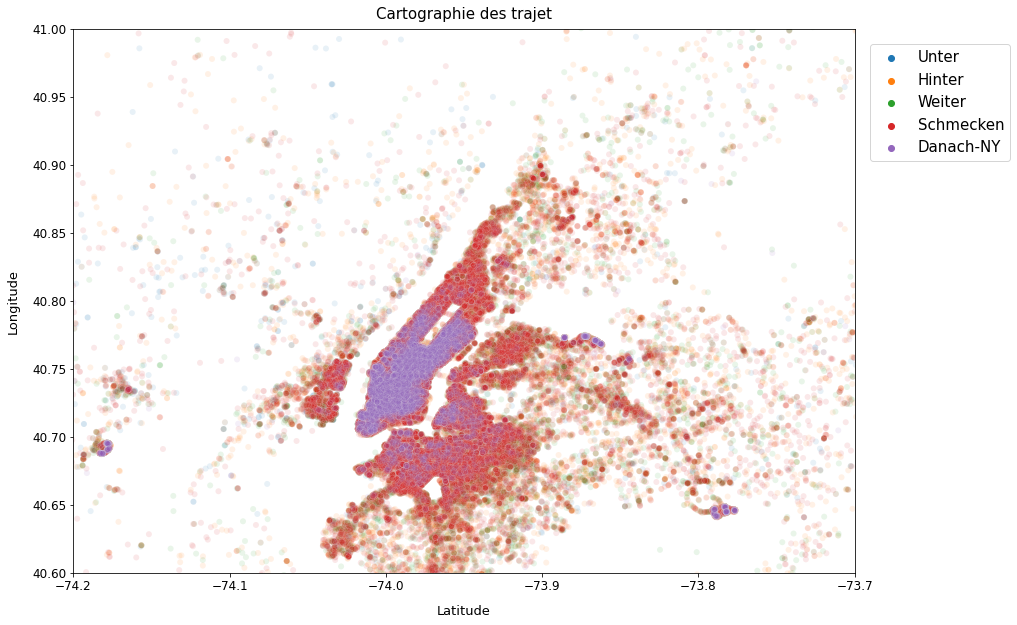

In [10]:
fig, ax = plt.subplots(figsize = (14,10))
sns.scatterplot(data = df_viz, x = "Lon", y = "Lat", hue = "Base", alpha=0.1, ax = ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Latitude", labelpad = 12, fontsize = 13)
plt.ylabel("Longitude", labelpad = 12, fontsize = 13)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 1, fontsize = 15)
plt.title("Cartographie des trajet", fontsize = 15, pad = 10)
plt.show()

* Circulation très dense à Manhattan.

In [11]:
hourly_ride = df_viz.groupby(["day_of_month", "hour", "day_name"])["Date_Time"].count()
hourly_ride = hourly_ride.reset_index()
hourly_ride = hourly_ride.rename(columns = {'Date_Time':'ride_count'})
hourly_ride = hourly_ride.loc[(hourly_ride["ride_count"] != 0)]
#hourly_ride['day_name'] = pd.Categorical(hourly_ride['day_name'], categories=day_order, ordered=True)
hourly_ride.head(5)

,day_of_month,hour,day_name,ride_count
0,1,0,Tuesday,138
1,1,1,Tuesday,66
2,1,2,Tuesday,53
3,1,3,Tuesday,93
4,1,4,Tuesday,166


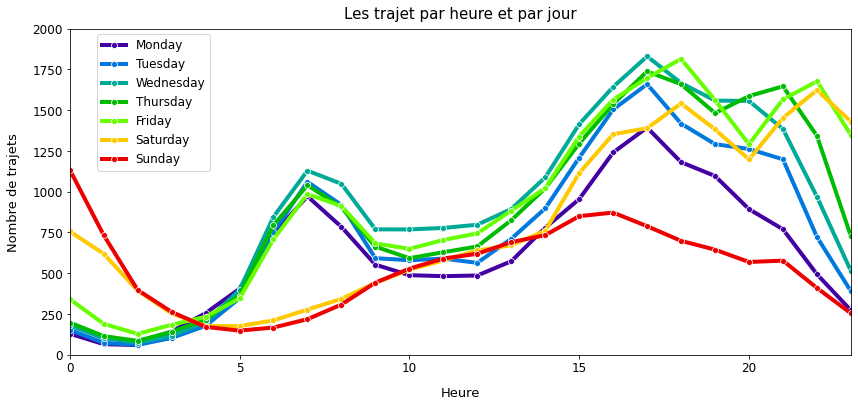

In [12]:
fig, ax = plt.subplots(figsize = (14,6))
sns.lineplot(data = hourly_ride, x = "hour", y = "ride_count", hue = "day_name", hue_order= day_order,
            marker="o", estimator="mean", ci= None, palette = 'nipy_spectral', ax = ax, lw = 4)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Heure",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de trajets",labelpad = 12, fontsize = 13)
plt.legend(day_order, bbox_to_anchor = (0.02, 1.02), loc = 2, borderaxespad = 1, fontsize = 12)
plt.xlim(0, 23)
plt.ylim(0, 2000)
plt.title("Les trajet par heure et par jour", fontsize = 15, pad = 10)
plt.show()

* Pour la semaine, heures des pointes sont le matin (7h - 8h) et après-midi (17h - 18h). Le trajet est le plus bas vers 2h du matin.
* Pour le week-end, heure des pointes sont  le vendredi soir et le samedi soir (23h -24h). Le trajet est le plus bas vers 5h du matin.

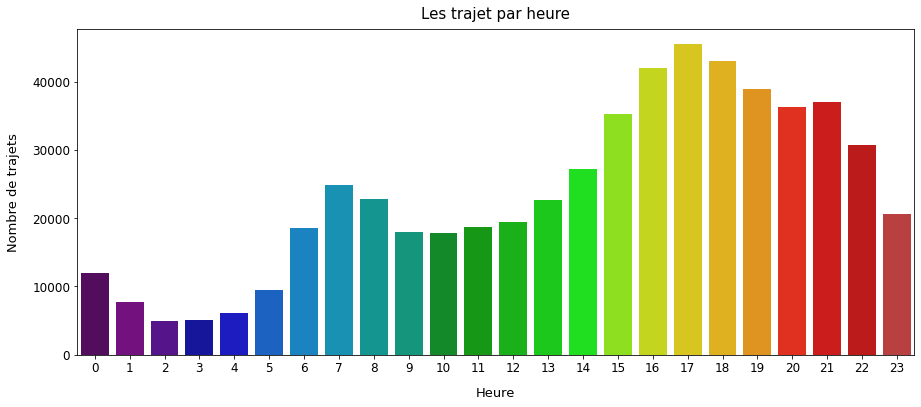

In [13]:
fig, ax = plt.subplots(figsize = (15,6))
sns.countplot(data = df_viz, x = 'hour', palette = 'nipy_spectral', ax = ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Heure",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de trajets",labelpad = 12, fontsize = 13)
plt.title("Les trajet par heure", fontsize = 15, pad=10)
plt.show()

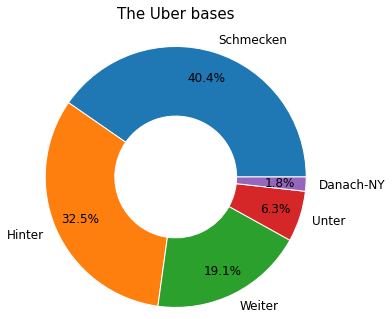

In [14]:
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(df_viz['Base'].value_counts().values, radius = 1.5, labels = df_viz['Base'].value_counts().index, 
        autopct='%1.1f%%', wedgeprops=dict(width=0.8, edgecolor='w'), startangle=0, pctdistance=0.8,  textprops={'fontsize': 12})
plt.title("The Uber bases",pad=50, fontsize = 15)
plt.show()

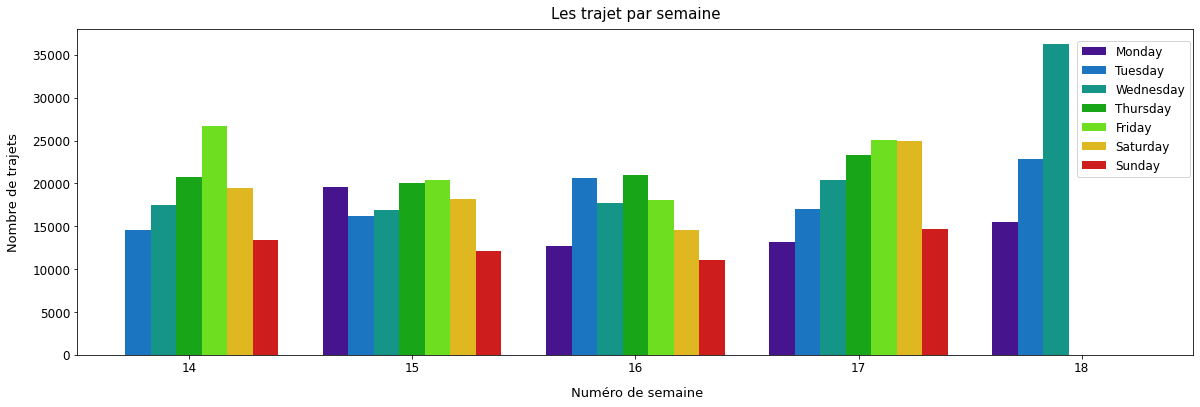

In [15]:
fig, ax = plt.subplots(figsize = (20,6))
sns.countplot(data = df_viz, x = 'week_of_year', palette = 'nipy_spectral', hue = 'day_name', hue_order= day_order, ax = ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel(" Numéro de semaine",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de trajets",labelpad = 12, fontsize = 13)
plt.legend(day_order, bbox_to_anchor = (0.885, 1), loc = 2, borderaxespad=1, fontsize= 12)
plt.title("Les trajet par semaine", fontsize = 15, pad=10)
plt.show()

* Choisir le mercredi 30 avril 2014 pour l'apprentissage automatique non supervisé.

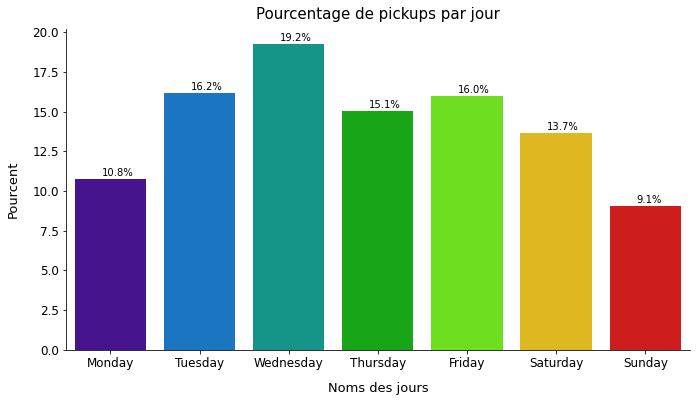

In [16]:
df_viz1 = df_viz["day_name"].value_counts(normalize=True)
df_viz1 = df_viz1.mul(100)
df_viz1 = df_viz1.rename('percent').reset_index()
g = sns.catplot(data=df_viz1, x='index', y='percent', order = day_order, palette='nipy_spectral', kind = 'bar', height=5, aspect=15/8)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height()+0.2
    g.ax.text(txt_x,txt_y,txt)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Noms des jours",labelpad = 12, fontsize = 13)
plt.ylabel("Pourcent",labelpad = 12, fontsize = 13)
plt.title("Pourcentage de pickups par jour", fontsize = 15, pad=10)
plt.show()

* Les dimanches ayant le plus petit nombre de trajets car c'est le dernier jour du week-end, les gens se reposent souvent ce jour-là avant de commencer le lundi.

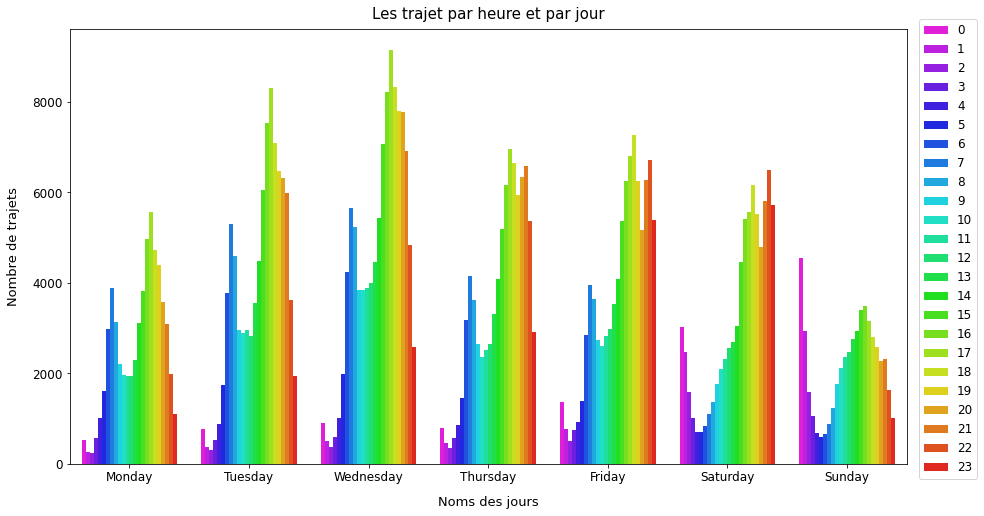

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_viz, x='day_name', order = day_order, palette='gist_rainbow_r', hue ='hour')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Noms des jours",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de trajets",labelpad = 12, fontsize = 13)
plt.legend(bbox_to_anchor = (1, 1.05), loc = 2, borderaxespad=1, fontsize= 12)
plt.title("Les trajet par heure et par jour", fontsize = 15, pad=10)
plt.show()

In [18]:
hourly_ride.head(2)

,day_of_month,hour,day_name,ride_count
0,1,0,Tuesday,138
1,1,1,Tuesday,66


Text(159.0, 0.5, 'Heure')

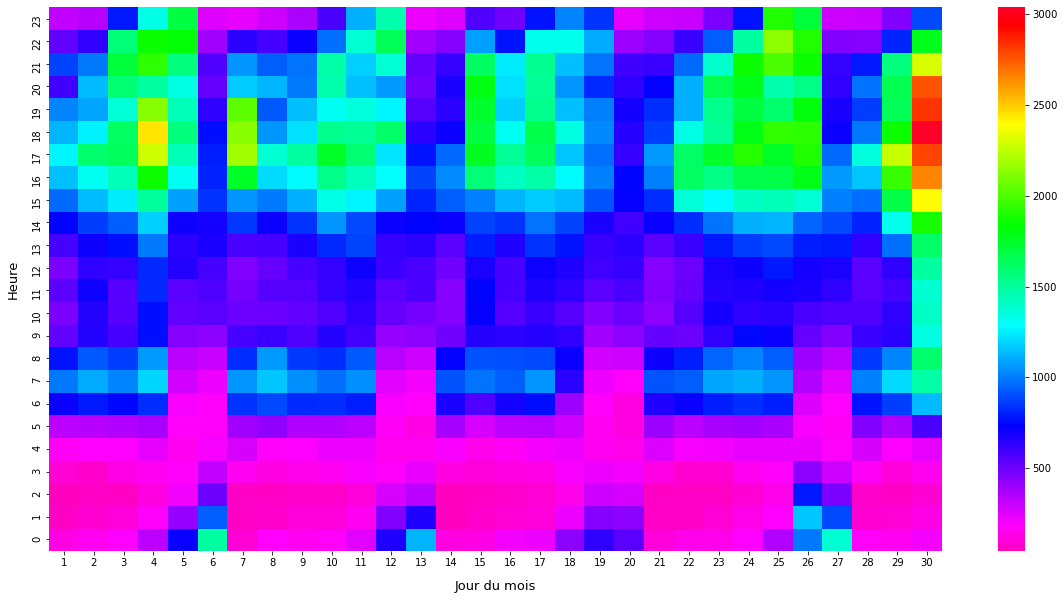

In [19]:
desity = hourly_ride.pivot("hour", "day_of_month", "ride_count")
plt.figure(figsize=(20,10))
ax = sns.heatmap(desity, annot=False, cmap = "gist_rainbow_r")
ax.invert_yaxis()
plt.xlabel("Jour du mois",labelpad = 12, fontsize = 13)
plt.ylabel("Heure",labelpad = 12, fontsize = 13)

In [ ]:
fig = px.density_heatmap(df_viz, x="day_name", y="hour", marginal_x="histogram", marginal_y="histogram",
                            labels={"hour": "Heure", "day_name": "Noms des jours"},
                            color_continuous_scale=px.colors.sequential.Rainbow)                            
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"), categoryarray = day_order)
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.show()

![density](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig7.png)

In [24]:
df_barh = df_viz.groupby(['day_name', 'hour']).size().reset_index().pivot(columns='day_name', index='hour', values=0)
df_barh = df_barh[day_order]
df_barh.head(5)

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685


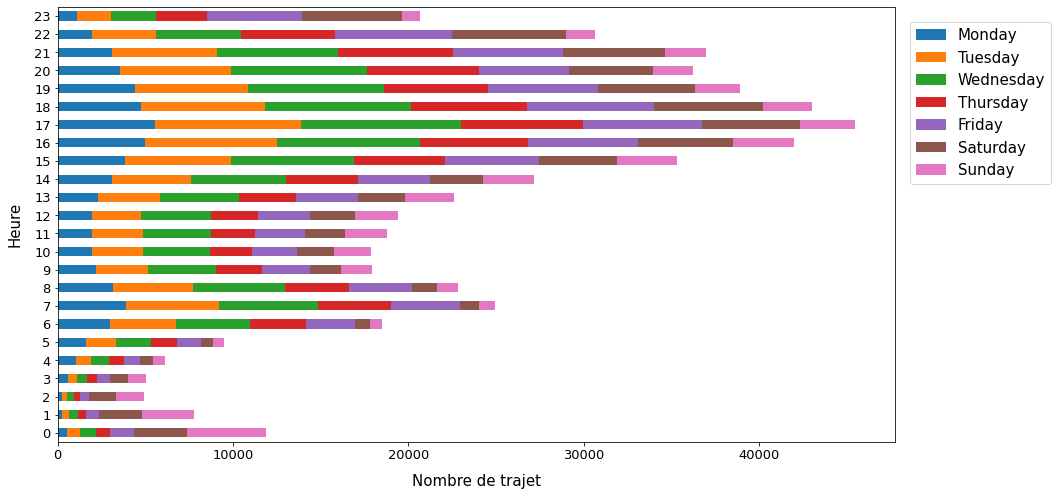

In [25]:
df_barh.plot(kind='barh', stacked=True, figsize=(15,8), fontsize = 13, legend=True)
plt.xlabel("Nombre de trajet",labelpad = 12, fontsize = 15)
plt.ylabel("Heure",labelpad = 12, fontsize = 15)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad=1, fontsize= 15)
plt.show()